Result predicted by Bayes decision rule: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]
bayes_Accuracy: 0.96 (+/- 0.05)
bayes_Precision: 0.96 (+/- 0.04)
bayes_Recall: 0.96 (+/- 0.04)
bayes_F1-score: 0.96 (+/- 0.04)


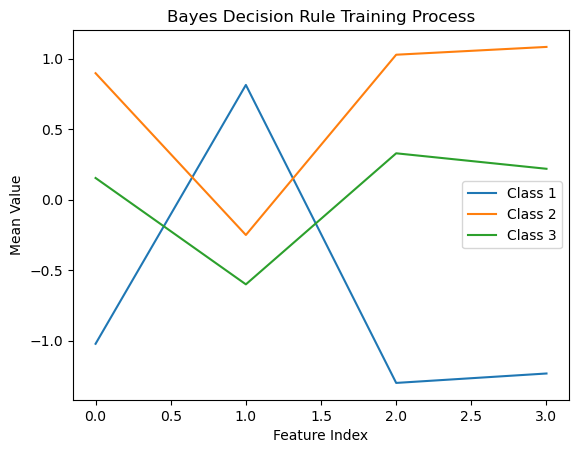

Result predicted by Fisher discriminant analysis: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]
Fisher_Accuracy: 0.97 (+/- 0.02)
Fisher_Precision: 0.98 (+/- 0.02)
Fisher_Recall: 0.97 (+/- 0.02)
Fisher_F1-score: 0.97 (+/- 0.02)


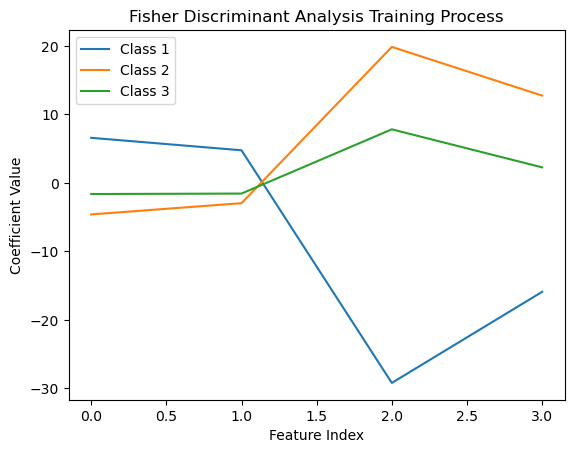

Result predicted by Decision trees: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]
tree_Accuracy: 0.94 (+/- 0.03)
tree_Precision: 0.94 (+/- 0.03)
tree_Recall: 0.94 (+/- 0.03)
tree_F1-score: 0.94 (+/- 0.03)


In [12]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the training data,labels and test data into numpy array
Data_Train = np.loadtxt('./Data_Train(1).txt')
Label_Train = np.loadtxt('./Label_Train(1).txt')
Data_test = np.loadtxt('./Data_test(1).txt')

# create an instance of the scaler,fit the scaler to the training data and transform both the training and test data
scaler = StandardScaler()
Data_Train = scaler.fit_transform(Data_Train)
Data_test = scaler.transform(Data_test)

# Initialize Classifier
bayes = GaussianNB()
fisher = LinearDiscriminantAnalysis()
tree = DecisionTreeClassifier()

# define the number of folds
n_folds = 5

# create a k-fold cross-validation object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# initialize lists to store evaluation metrics
bayes_accuracy_scores = []
bayes_precision_scores = []
bayes_recall_scores = []
bayes_f1_scores = []

fisher_accuracy_scores = []
fisher_precision_scores = []
fisher_recall_scores = []
fisher_f1_scores = []

tree_accuracy_scores = []
tree_precision_scores = []
tree_recall_scores = []
tree_f1_scores = []

# loop over the folds
for train_index, test_index in kf.split(Data_Train):
    # split the data into train and test sets for this fold
    X_train, X_test = Data_Train[train_index], Data_Train[test_index]
    y_train, y_test = Label_Train[train_index], Label_Train[test_index]
    
    # train three classifier on the training set for this fold
    bayes.fit(X_train, y_train)
    fisher.fit(X_train, y_train)
    tree.fit(X_train, y_train)
    
    # predict class labels for the test set for this fold
    bayes_pred = bayes.predict(X_test)
    fisher_pred = fisher.predict(X_test)
    tree_pred = tree.predict(X_test)
    
    # evaluate the classifier on the test set for this fold
    bayes_accuracy_scores.append(accuracy_score(y_test, bayes_pred))
    bayes_precision_scores.append(precision_score(y_test, bayes_pred, average='macro'))
    bayes_recall_scores.append(recall_score(y_test, bayes_pred, average='macro'))
    bayes_f1_scores.append(f1_score(y_test, bayes_pred, average='macro'))
    
    fisher_accuracy_scores.append(accuracy_score(y_test, fisher_pred))
    fisher_precision_scores.append(precision_score(y_test, fisher_pred, average='macro'))
    fisher_recall_scores.append(recall_score(y_test, fisher_pred, average='macro'))
    fisher_f1_scores.append(f1_score(y_test, fisher_pred, average='macro'))
    
    tree_accuracy_scores.append(accuracy_score(y_test, tree_pred))
    tree_precision_scores.append(precision_score(y_test, tree_pred, average='macro'))
    tree_recall_scores.append(recall_score(y_test, tree_pred, average='macro'))
    tree_f1_scores.append(f1_score(y_test, tree_pred, average='macro'))
    
# Predict class labels of test data using each classifier
bayes_pred = bayes.predict(Data_test)
fisher_pred = fisher.predict(Data_test)
tree_pred = tree.predict(Data_test)

# print the mean and standard deviation of the evaluation metrics over all folds
print("Result predicted by Bayes decision rule:",bayes_pred)
print("bayes_Accuracy: {:.2f} (+/- {:.2f})".format(np.mean(bayes_accuracy_scores), np.std(bayes_accuracy_scores)))
print("bayes_Precision: {:.2f} (+/- {:.2f})".format(np.mean(bayes_precision_scores), np.std(bayes_precision_scores)))
print("bayes_Recall: {:.2f} (+/- {:.2f})".format(np.mean(bayes_recall_scores), np.std(bayes_recall_scores)))
print("bayes_F1-score: {:.2f} (+/- {:.2f})".format(np.mean(bayes_f1_scores), np.std(bayes_f1_scores)))
# Plot training process for Bayes classifiers 
plt.plot(bayes.theta_[0], label='Class 1')
plt.plot(bayes.theta_[1], label='Class 2')
plt.plot(bayes.theta_[2], label='Class 3')
plt.title('Bayes Decision Rule Training Process')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.legend()
plt.show()
print("Result predicted by Fisher discriminant analysis:",fisher_pred)
print("Fisher_Accuracy: {:.2f} (+/- {:.2f})".format(np.mean(fisher_accuracy_scores), np.std(fisher_accuracy_scores)))
print("Fisher_Precision: {:.2f} (+/- {:.2f})".format(np.mean(fisher_precision_scores), np.std(fisher_precision_scores)))
print("Fisher_Recall: {:.2f} (+/- {:.2f})".format(np.mean(fisher_recall_scores), np.std(fisher_recall_scores)))
print("Fisher_F1-score: {:.2f} (+/- {:.2f})".format(np.mean(fisher_f1_scores), np.std(fisher_f1_scores)))
# Plot training process for fisher classifiers
plt.plot(fisher.coef_[0], label='Class 1')
plt.plot(fisher.coef_[1], label='Class 2')
plt.plot(fisher.coef_[2], label='Class 3')
plt.title('Fisher Discriminant Analysis Training Process')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()
print("Result predicted by Decision trees:",tree_pred)
print("tree_Accuracy: {:.2f} (+/- {:.2f})".format(np.mean(tree_accuracy_scores), np.std(tree_accuracy_scores)))
print("tree_Precision: {:.2f} (+/- {:.2f})".format(np.mean(tree_precision_scores), np.std(tree_precision_scores)))
print("tree_Recall: {:.2f} (+/- {:.2f})".format(np.mean(tree_recall_scores), np.std(tree_recall_scores)))
print("tree_F1-score: {:.2f} (+/- {:.2f})".format(np.mean(tree_f1_scores), np.std(tree_f1_scores)))